# New York City Crash Report 
## Group E (NYC Crashers)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import requests
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Reading and Assessment of Data 

In [3]:
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1')
df.info()

C:\Users\kiran\AppData\Local\Temp\ipykernel_17416\3975778814.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069364 entries, 0 to 2069363
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [4]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.836091e+06,1.836091e+06,2.069346e+06,2.069333e+06,2.069364e+06,2.069364e+06,2.069364e+06,2.069364e+06,2.069364e+06,2.069364e+06,2.069364e+06
mean,4.062767e+01,-7.375209e+01,3.091155e-01,1.488886e-03,5.641588e-02,7.393576e-04,2.674348e-02,1.145279e-04,2.223630e-01,6.117822e-04,3.155088e+06
std,1.981001e+00,3.724346e+00,6.995259e-01,4.070347e-02,2.438347e-01,2.765694e-02,1.633362e-01,1.074623e-02,6.606356e-01,2.707739e-02,1.505012e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066782e+01,-7.397485e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.153461e+06
50%,4.072084e+01,-7.392727e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.670920e+06
75%,4.076960e+01,-7.386673e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.188505e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.706143e+06


In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRASH DATE,09/11/2021,03/26/2022,06/29/2022,09/11/2021,12/14/2021,04/14/2021,12/14/2021,12/14/2021,12/14/2021,12/14/2021
CRASH TIME,2:39,11:45,6:55,9:35,8:13,12:47,17:05,8:17,21:10,14:58
BOROUGH,NaN,NaN,NaN,BROOKLYN,BROOKLYN,NaN,NaN,BRONX,BROOKLYN,MANHATTAN
ZIP CODE,NaN,NaN,NaN,11208.0,11233.0,NaN,NaN,10475.0,11207.0,10017.0
LATITUDE,NaN,NaN,NaN,40.667202,40.683304,NaN,40.709183,40.86816,40.67172,40.75144
LONGITUDE,NaN,NaN,NaN,-73.8665,-73.917274,NaN,-73.956825,-73.83148,-73.8971,-73.97397
LOCATION,NaN,NaN,NaN,"(40.667202, -73.8665)","(40.683304, -73.917274)",NaN,"(40.709183, -73.956825)","(40.86816, -73.83148)","(40.67172, -73.8971)","(40.75144, -73.97397)"
ON STREET NAME,WHITESTONE EXPRESSWAY,QUEENSBORO BRIDGE UPPER,THROGS NECK BRIDGE,NaN,SARATOGA AVENUE,MAJOR DEEGAN EXPRESSWAY RAMP,BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,3 AVENUE
CROSS STREET NAME,20 AVENUE,NaN,NaN,NaN,DECATUR STREET,NaN,NaN,NaN,NaN,EAST 43 STREET
OFF STREET NAME,NaN,NaN,NaN,1211 LORING AVENUE,NaN,NaN,NaN,344 BAYCHESTER AVENUE,2047 PITKIN AVENUE,NaN


* Assessment of the data's top values

In [6]:
df["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705280
Driver Inattention/Distraction    413784
Failure to Yield Right-of-Way     122835
Following Too Closely             110541
Backing Unsafely                   76540
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64

In [7]:
for i in range(1,6):
    df_cfv = df["CONTRIBUTING FACTOR VEHICLE "+str(i)].value_counts()
    print(f"===================== Contributing factor {i} =============================")
    print(df_cfv)

===================== Contributing factor 1 =============================
CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       705280
Driver Inattention/Distraction    413784
Failure to Yield Right-of-Way     122835
Following Too Closely             110541
Backing Unsafely                   76540
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64
===================== Contributing factor 2 =============================
CONTRIBUTING FACTOR VEHICLE 2
Unspecified                       1472581
Driver Inattention/Distraction      93998
Other Vehicular                     31985
Following Too Closely               18963
Failure to Yield Right-of-Way       17078
                                   ...   
Eating or Drinking                     11
Listening

In [8]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           643847
ZIP CODE                          644097
LATITUDE                          233273
LONGITUDE                         233273
LOCATION                          233273
ON STREET NAME                    438882
CROSS STREET NAME                 781348
OFF STREET NAME                  1722855
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6758
CONTRIBUTING FACTOR VEHICLE 2     320278
CONTRIBUTING FACTOR VEHICLE 3    1921629
CONTRIBUTING FACTOR VEHICLE 4    2036037
CONTRIBUTING FACTOR VEHICLE 5    2060344
COLLISION_ID                           0
VEHICLE TYPE COD

Seeeing as Columns CONTRIBUTING FACTOR VEHICLE 3-5 and VEHICLE TYPE CODE 3-5 are columns that are mostly empty we can drop these columns and focus on the main data in order to furhter our analysis.

In [9]:
df.drop(['CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5'],axis=1,inplace=True)
df.drop(['VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069364 entries, 0 to 2069363
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [10]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [11]:
v_type1 = df['VEHICLE TYPE CODE 1'].value_counts()

In [12]:
v_type2 = df['VEHICLE TYPE CODE 2'].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
  Text(2, 0, 'PASSENGER VEHICLE'),
  Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
  Text(4, 0, 'Taxi'),
  Text(5, 0, '4 dr sedan'),
  Text(6, 0, 'Pick-up Truck'),
  Text(7, 0, 'TAXI'),
  Text(8, 0, 'VAN'),
  Text(9, 0, 'Box Truck')])

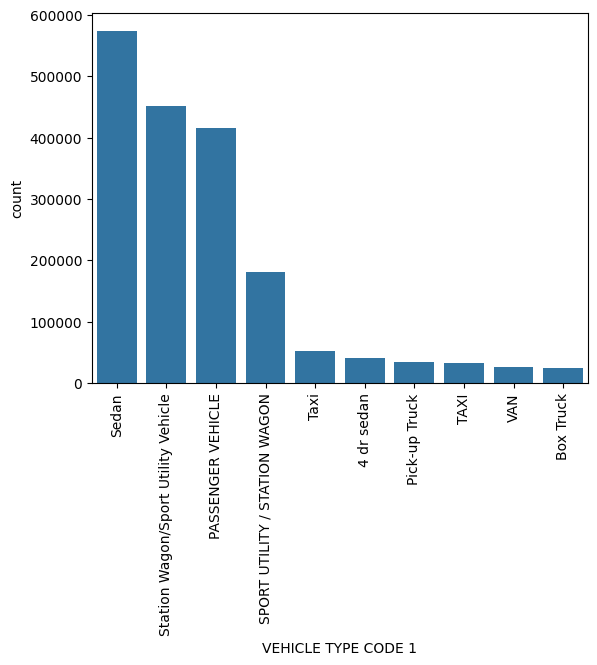

In [13]:
sns.barplot(v_type1[0:10])
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sedan'),
  Text(1, 0, 'Station Wagon/Sport Utility Vehicle'),
  Text(2, 0, 'PASSENGER VEHICLE'),
  Text(3, 0, 'SPORT UTILITY / STATION WAGON'),
  Text(4, 0, 'UNKNOWN'),
  Text(5, 0, 'Taxi'),
  Text(6, 0, 'Bike'),
  Text(7, 0, 'Pick-up Truck'),
  Text(8, 0, '4 dr sedan'),
  Text(9, 0, 'Box Truck')])

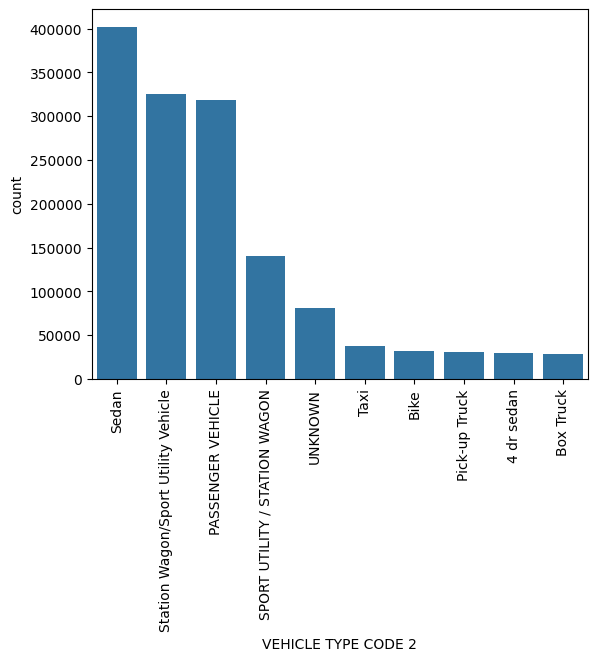

In [14]:
sns.barplot(v_type2[0:10])
plt.xticks(rotation=90)

The API application that is proposed will most likely be built using a K-Means clustering algorithm so in this case the best feature to use would be the longitude and latitude features. However some coordinates are missing so if the street names are provided for those missing rows, the values can be obtained using the OpenStreetMap Nominatim  API.

In [15]:
df_no_locs = df[df['LOCATION'].isna()]
df_street_names = df_no_locs[df_no_locs['ON STREET NAME'].notna()].shape

From the column above there are 177173 columns where the street name is known but not the location so we can input this data into the OpenStreetMap Nominatim API and get the approximate coordinates of the accidents. Since the dataset is soo large the other rows where the data is not known can simply be dropped as it may not have a ssignificant effect on the outcome of the analysis.

In [16]:
'''
addresses = list(df_street_names['ON STREET NAME'])
locations = []
for address in addresses:
    base_url = 'https://nominatim.openstreetmap.org/search'
    params = {'q': address, 'format': 'json'}
    response = requests.get(base_url, params=params)
    data = response.json()

    if data:
        lat = float(data[0]['lat'])
        lon = float(data[0]['lon'])
        locations = [lat,lon]
    else:
        print("Error receiving coordinates")
'''

'\naddresses = list(df_street_names[\'ON STREET NAME\'])\nlocations = []\nfor address in addresses:\n    base_url = \'https://nominatim.openstreetmap.org/search\'\n    params = {\'q\': address, \'format\': \'json\'}\n    response = requests.get(base_url, params=params)\n    data = response.json()\n\n    if data:\n        lat = float(data[0][\'lat\'])\n        lon = float(data[0][\'lon\'])\n        locations = [lat,lon]\n    else:\n        print("Error receiving coordinates")\n'

In [17]:
df['NUM PERSONS AFFECTED'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']

In [18]:
reg_df = df[['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED']]
reg_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUM PERSONS AFFECTED
0,2021-09-11,2:39,NaN,2.0,0.0,2.0
1,2022-03-26,11:45,NaN,1.0,0.0,1.0
2,2022-06-29,6:55,NaN,0.0,0.0,0.0
3,2021-09-11,9:35,BROOKLYN,0.0,0.0,0.0
4,2021-12-14,8:13,BROOKLYN,0.0,0.0,0.0


In [19]:
reg_df['BOROUGH'].unique()

array([nan, 'BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [22]:
reg_df['Month'] = reg_df['CRASH DATE'].dt.month
reg_df['Year'] = reg_df['CRASH DATE'].dt.year
reg_df['month_year'] = reg_df['CRASH DATE'].dt.to_period('M')
reg_df['month_year'] = reg_df['month_year'].astype(str)
reg_df['month_year'] = pd.to_datetime(reg_df['month_year'])

C:\Users\kiran\AppData\Local\Temp\ipykernel_17416\2203625550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['Month'] = reg_df['CRASH DATE'].dt.month
C:\Users\kiran\AppData\Local\Temp\ipykernel_17416\2203625550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_df['Year'] = reg_df['CRASH DATE'].dt.year
C:\Users\kiran\AppData\Local\Temp\ipykernel_17416\2203625550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [23]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069364 entries, 0 to 2069363
Data columns (total 9 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   CRASH DATE                 datetime64[ns]
 1   CRASH TIME                 object        
 2   BOROUGH                    object        
 3   NUMBER OF PERSONS INJURED  float64       
 4   NUMBER OF PERSONS KILLED   float64       
 5   NUM PERSONS AFFECTED       float64       
 6   Month                      int32         
 7   Year                       int32         
 8   month_year                 datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int32(2), object(2)
memory usage: 126.3+ MB


In [24]:
reg_df_2 = reg_df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED','month_year']]
reg_df_2 = reg_df_2.groupby('month_year').sum()
reg_df_2.head()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUM PERSONS AFFECTED
month_year,,,
2012-07-01,4855.0,22.0,4877.0
2012-08-01,4751.0,27.0,4778.0
2012-09-01,4689.0,26.0,4715.0
2012-10-01,4572.0,21.0,4593.0
2012-11-01,3995.0,14.0,4009.0


In [25]:
reg_df_2['num_injured(thousands)'] = reg_df_2['NUMBER OF PERSONS INJURED']/1000
reg_df_2['num_killed(tens)'] = reg_df_2['NUMBER OF PERSONS KILLED']/10
reg_df_2['num_affected(thousands)'] = reg_df_2['NUM PERSONS AFFECTED']/1000
reg_df_2 = reg_df_2.drop(['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUM PERSONS AFFECTED'],axis=1)
reg_df_2.head()

,num_injured(thousands),num_killed(tens),num_affected(thousands)
month_year,,,
2012-07-01,4.855,2.2,4.877
2012-08-01,4.751,2.7,4.778
2012-09-01,4.689,2.6,4.715
2012-10-01,4.572,2.1,4.593
2012-11-01,3.995,1.4,4.009


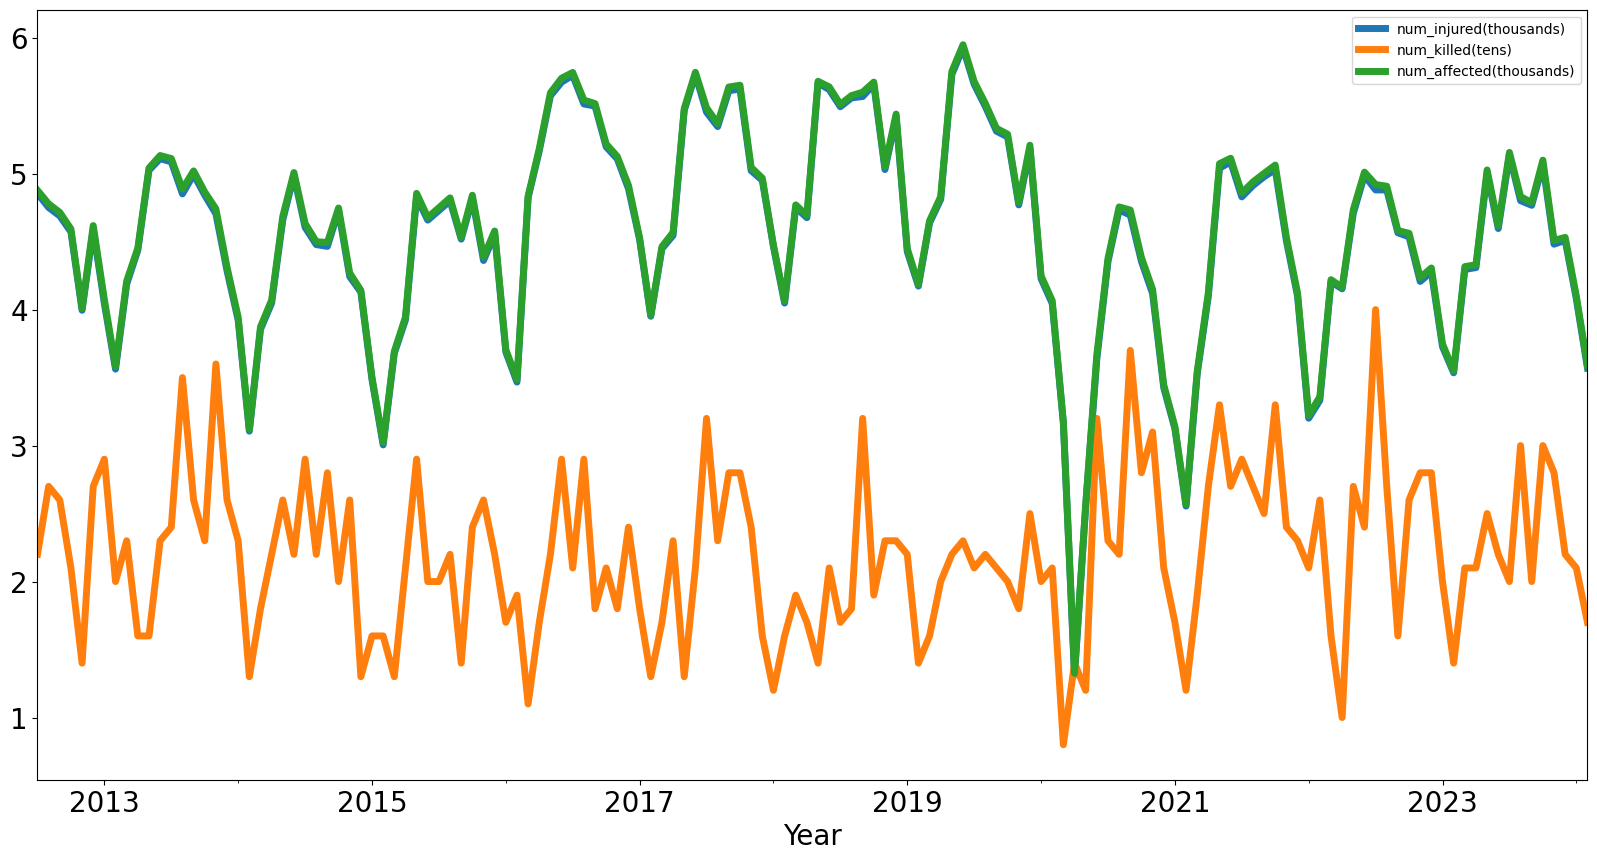

In [26]:
reg_df_2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Text(0.5, 0, 'Year')

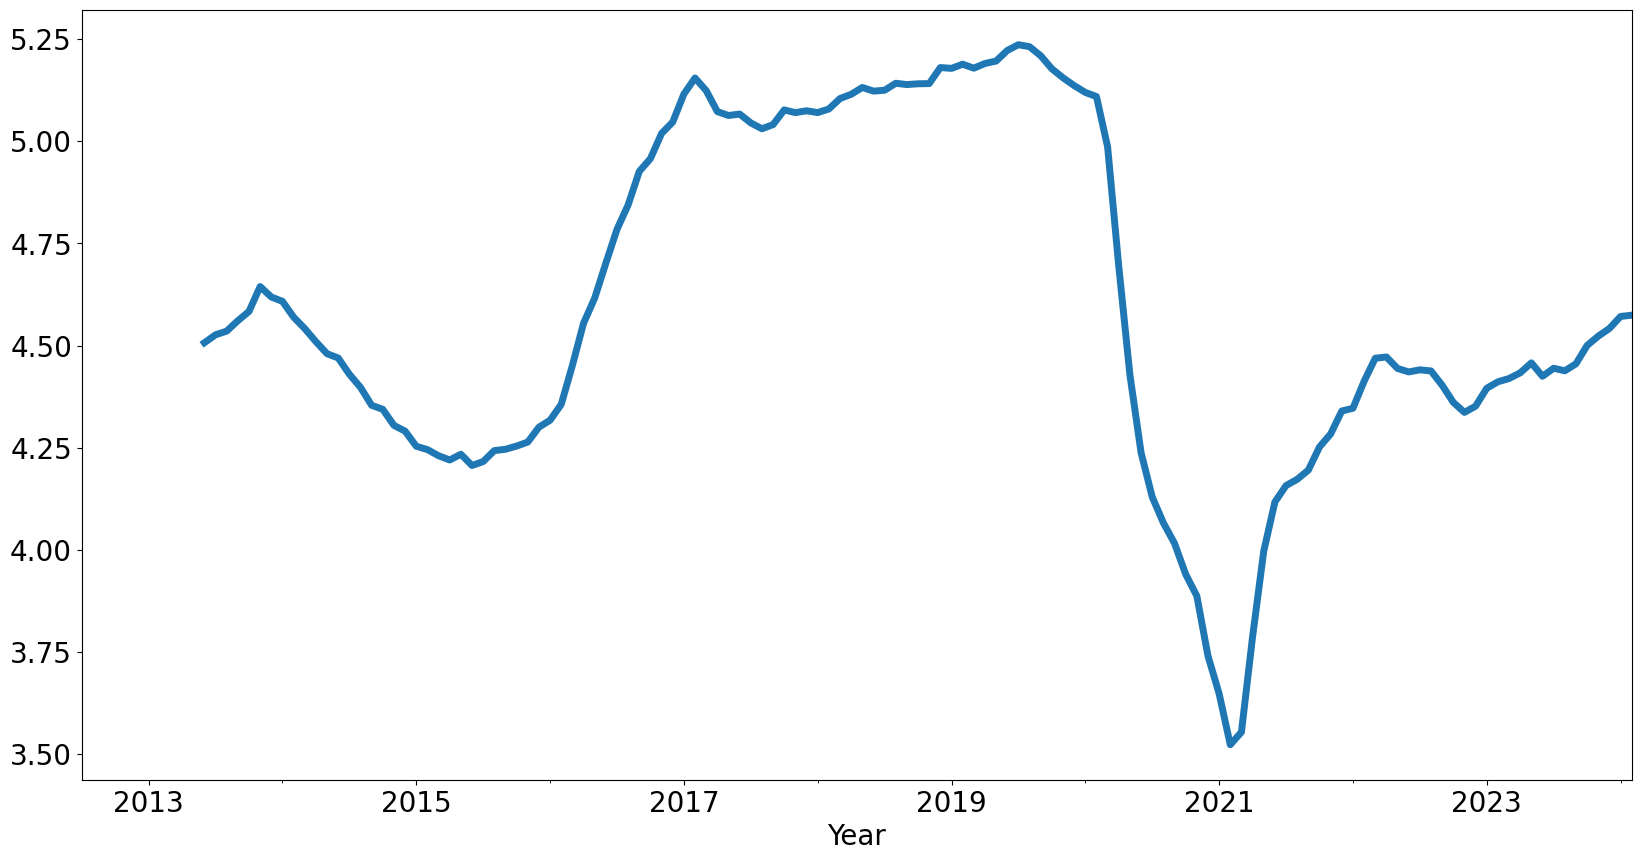

In [27]:
affected = reg_df_2['num_affected(thousands)'].copy()
affected.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

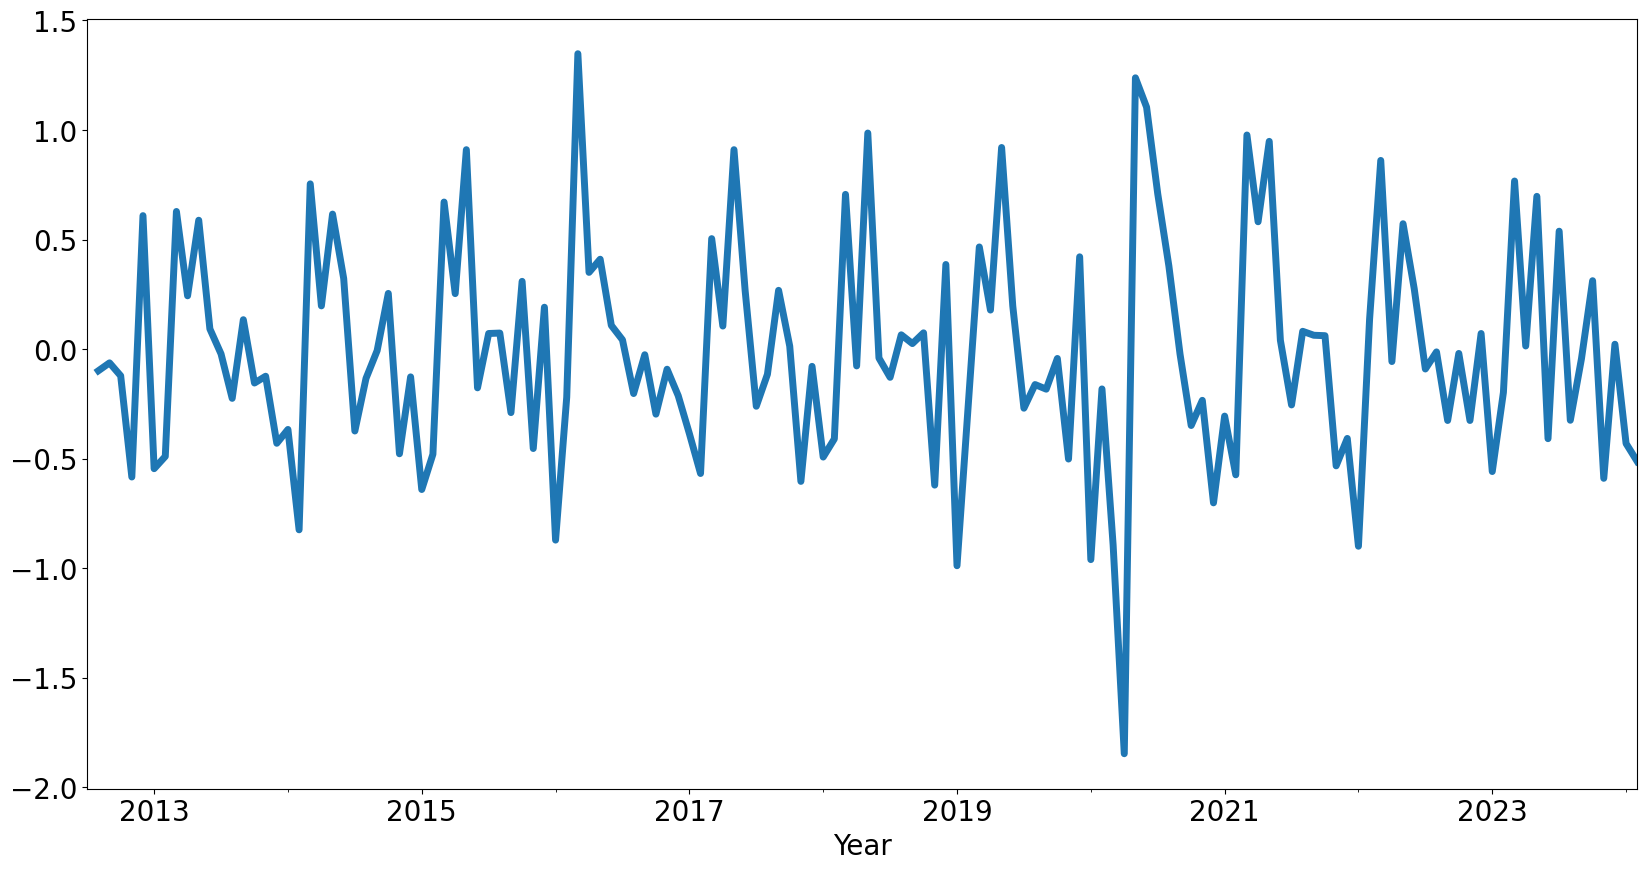

In [28]:
affected.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [39]:
affected = reg_df_2[['num_affected(thousands)']].copy()
#affected['num_affected(thousands)'] = reg_df_2['num_affected(thousands)'].astype(np.float64)

In [40]:
affected

,num_affected(thousands)
month_year,
2012-07-01,4.877
2012-08-01,4.778
2012-09-01,4.715
2012-10-01,4.593
2012-11-01,4.009
...,...
2023-10-01,5.099
2023-11-01,4.509
2023-12-01,4.531


In [50]:
train = affected[affected.index.year < 2023]
test = affected[affected.index.year == 2023]

Naive Approach

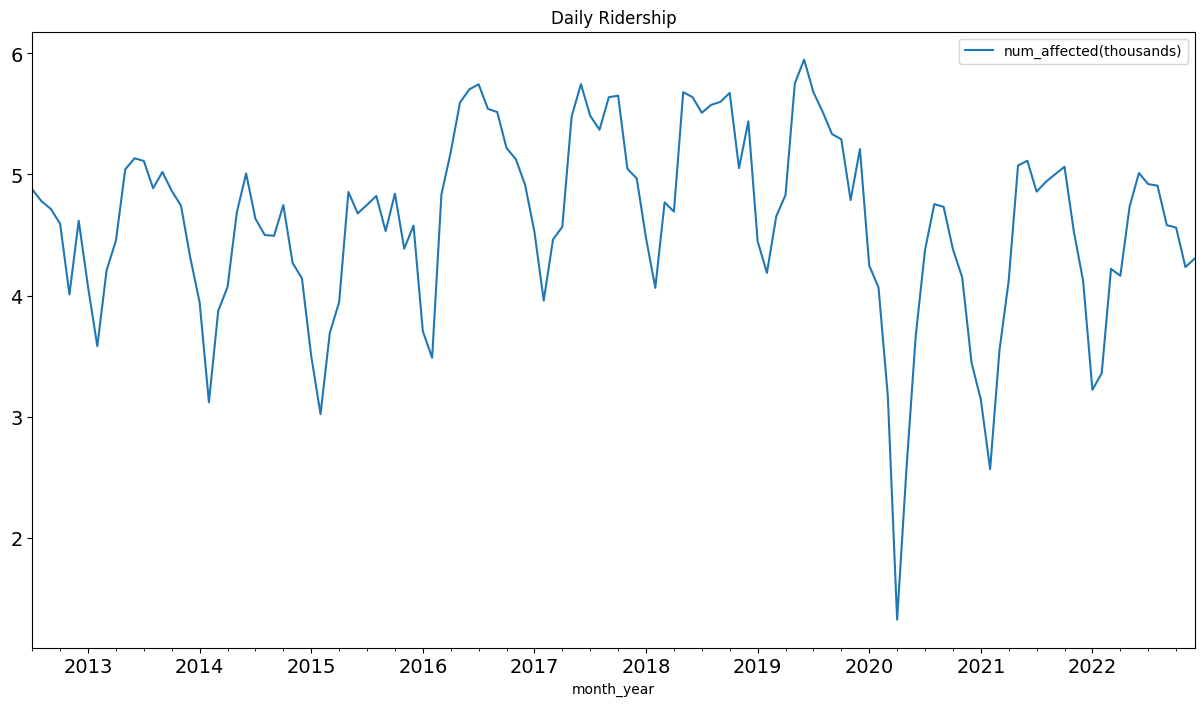

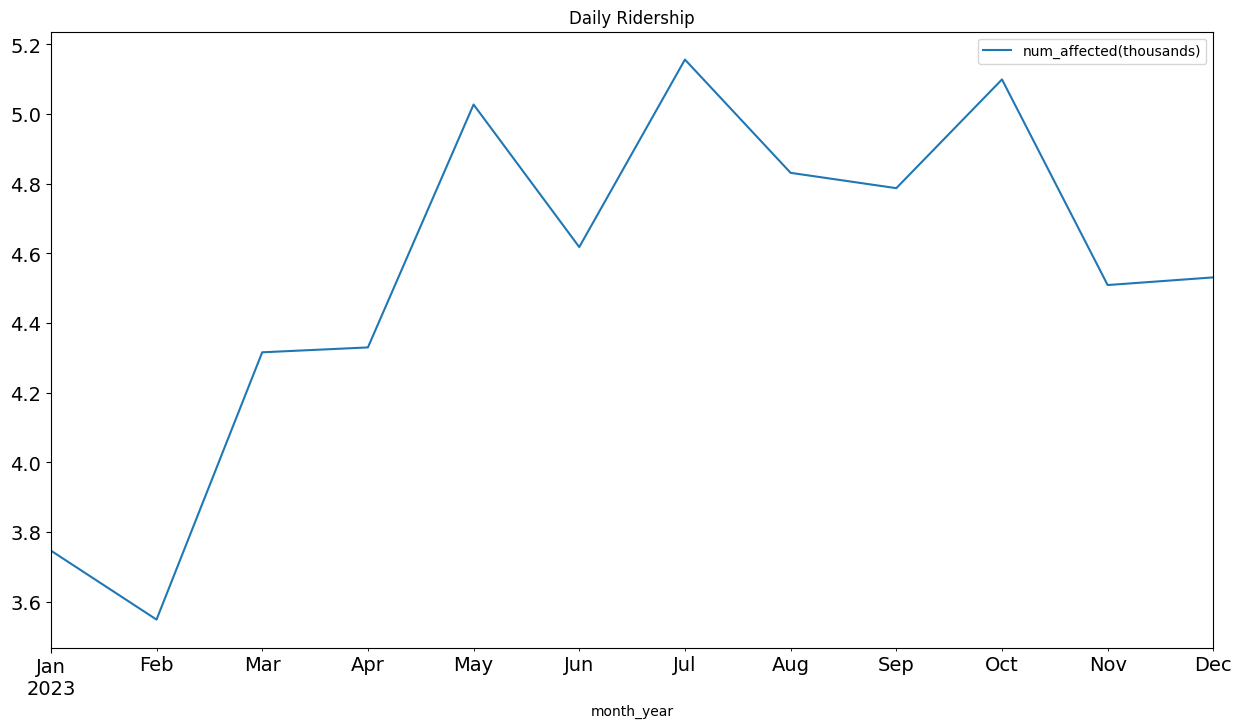

In [51]:
train.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [56]:
dd= np.asarray(train['num_affected(thousands)'])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

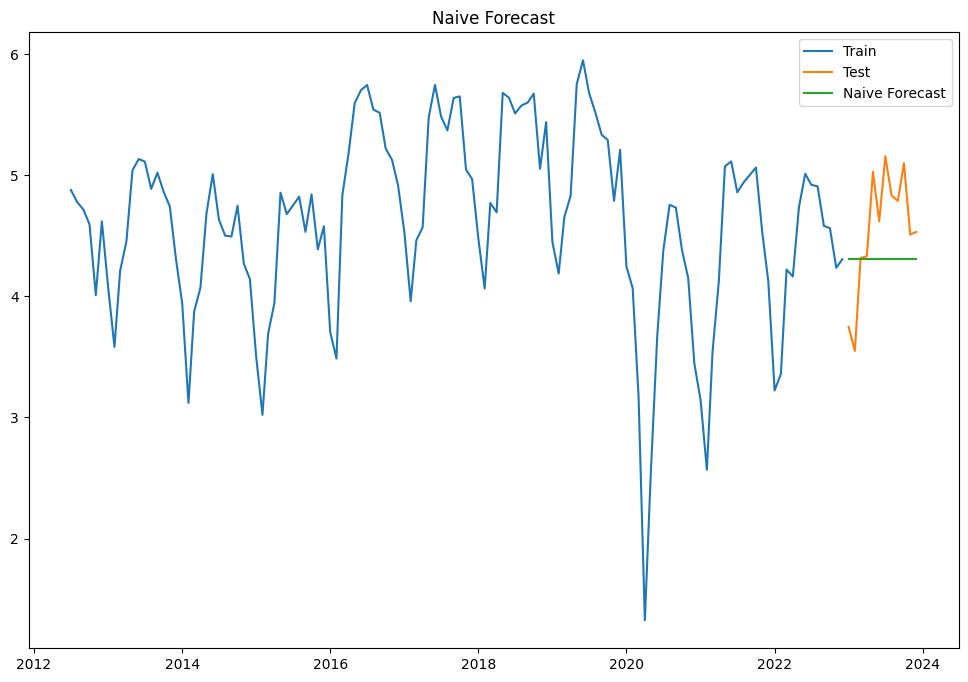

In [58]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index,test, label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [61]:
rms = np.sqrt(mean_squared_error(test['num_affected(thousands)'], y_hat.naive))
print(rms)

0.5364668365021893


Simple Average

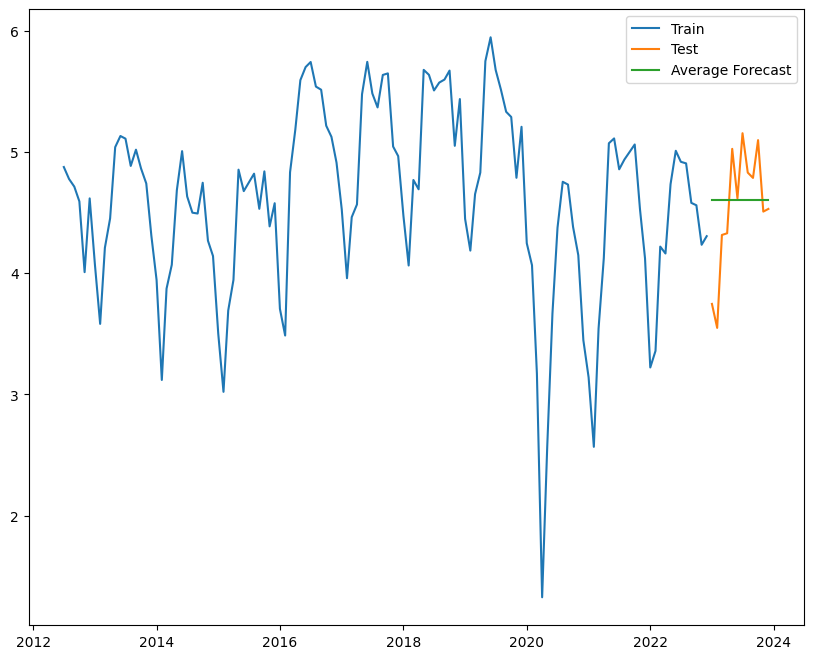

In [71]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['num_affected(thousands)'].mean()
plt.figure(figsize=(10,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [73]:
rms = np.sqrt(mean_squared_error(test['num_affected(thousands)'], y_hat_avg.avg_forecast))
print(rms)

0.48639427017022097


Moving Average Forecast

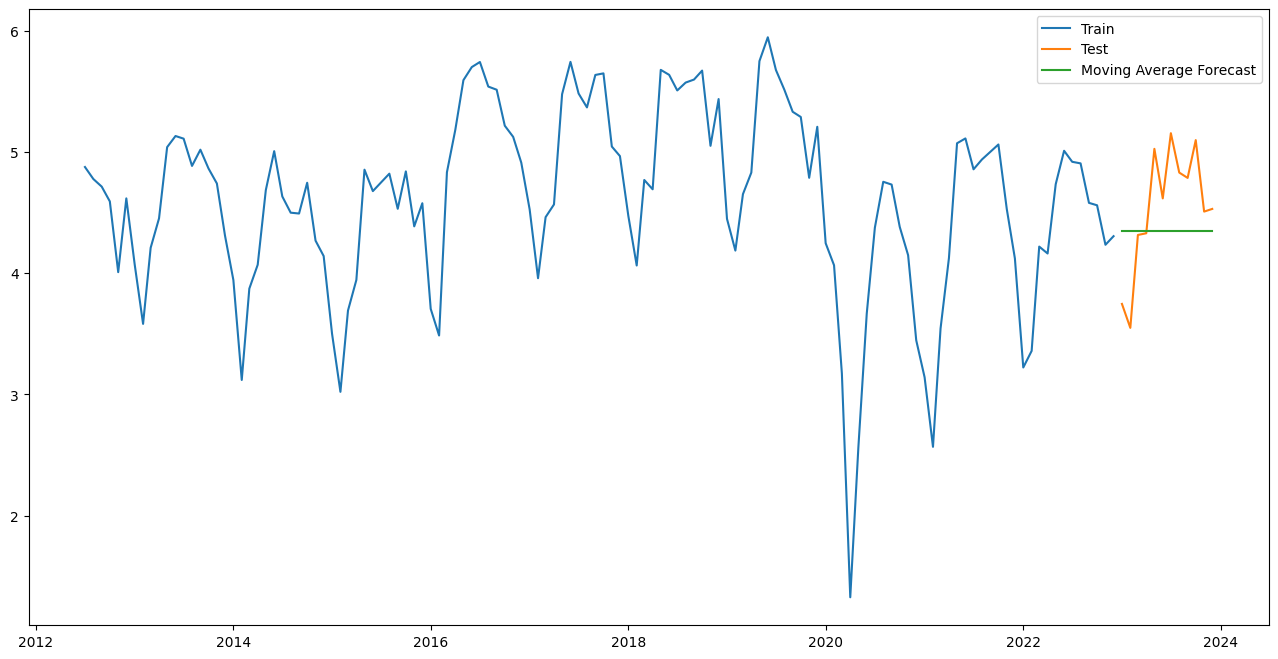

In [74]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['num_affected(thousands)'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [75]:
rms = np.sqrt(mean_squared_error(test['num_affected(thousands)'], y_hat_avg.moving_avg_forecast))
print(rms)

0.518032710249931


Simple Exponential smoothing

C:\Users\kiran\AppData\Local\Temp\ipykernel_17416\3406311179.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(ft, test['num_affected(thousands)'][0])
C:\Users\kiran\AppData\Local\Temp\ipykernel_17416\3406311179.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dt = test['num_affected(thousands)'][i-1]
c:\Users\kiran\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
c:\

num_affected(thousands)    4.467536
Name: 2022-12-01 00:00:00, dtype: float64 3.747
0.4455905617752793


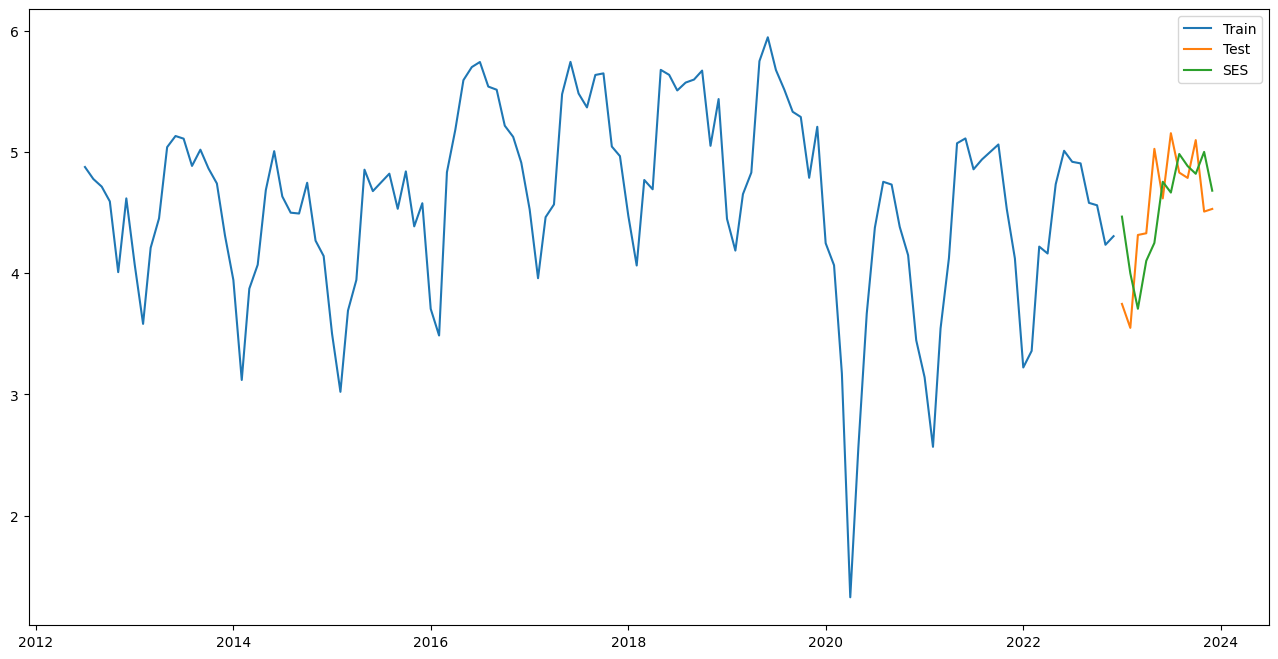

In [76]:
y_hat_avg = test.copy()

pred = []
#s = 9
a = 0.65
#a = 2/(s+1)
#ft = pd.DataFrame.ewm(train, alpha = a).mean()['gym'][-1]
ft = pd.DataFrame.ewm(train, span = 10).mean().iloc[-1]
#ft = train['gym'].mean()
pred.append(ft)
print(ft, test['num_affected(thousands)'][0])
for i in range(1,len(test['num_affected(thousands)'])):
    dt = test['num_affected(thousands)'][i-1]
    ft_plus_1 = a*dt + (1-a)*ft
    #print(i, dt, ft, ft_plus_1)
    pred.append(ft_plus_1)
    ft = ft_plus_1
y_hat_avg['SES'] = pd.Series(pred).values

rms = np.sqrt(mean_squared_error(test, y_hat_avg.SES))
print(rms)

plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [78]:
rms = np.sqrt(mean_squared_error(test['num_affected(thousands)'], y_hat_avg.SES))
print(rms)

0.4455905617752793


c:\Users\kiran\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
